# Analyze Unit Timings in Starcraft II



We use timings.Analyzer to build an array of third nexus timings. Each value in this array is the number of seconds into the game that the third nexus finished. This isn't that large of a dataset(relative to the number of replays we have), because it requires a protoss player to make it into the late game. There is a large variance in this dataset because so much can happen leading up to the third nexus.

We can compare an individual nexus timing to the overall masses with this jupyter notebook. Set the variable KTRolster_zest_third_nexus_timing and rerun all steps after that.

In [95]:
from timings import Analyzer

In [96]:
a = Analyzer()


In [97]:
a.process()

In [129]:
# Import data from the analyzer object
nexus = a.third_nexus_timings

# analyzer returns frame number, so divide by 16 to get the second
secs = [i/16. for i in nexus]

# We have the time that the building finished, so subtract build time (71) to get start time
secs = [i-71 for i in secs] 

# Sort the timings
secs = sorted(secs)

# Clear out outliers
secs = [i for i in secs if i < 600 ] # These are likely games that had early pressure/cheese but then normalized

### This is the Code to build a graph


Modify KTRolster_Zest_third_nexus_timing with the timing of an individual game. Use Minutes:seconds such as 5:36

336
(300.0, 600.0, 0.0, 0.012)


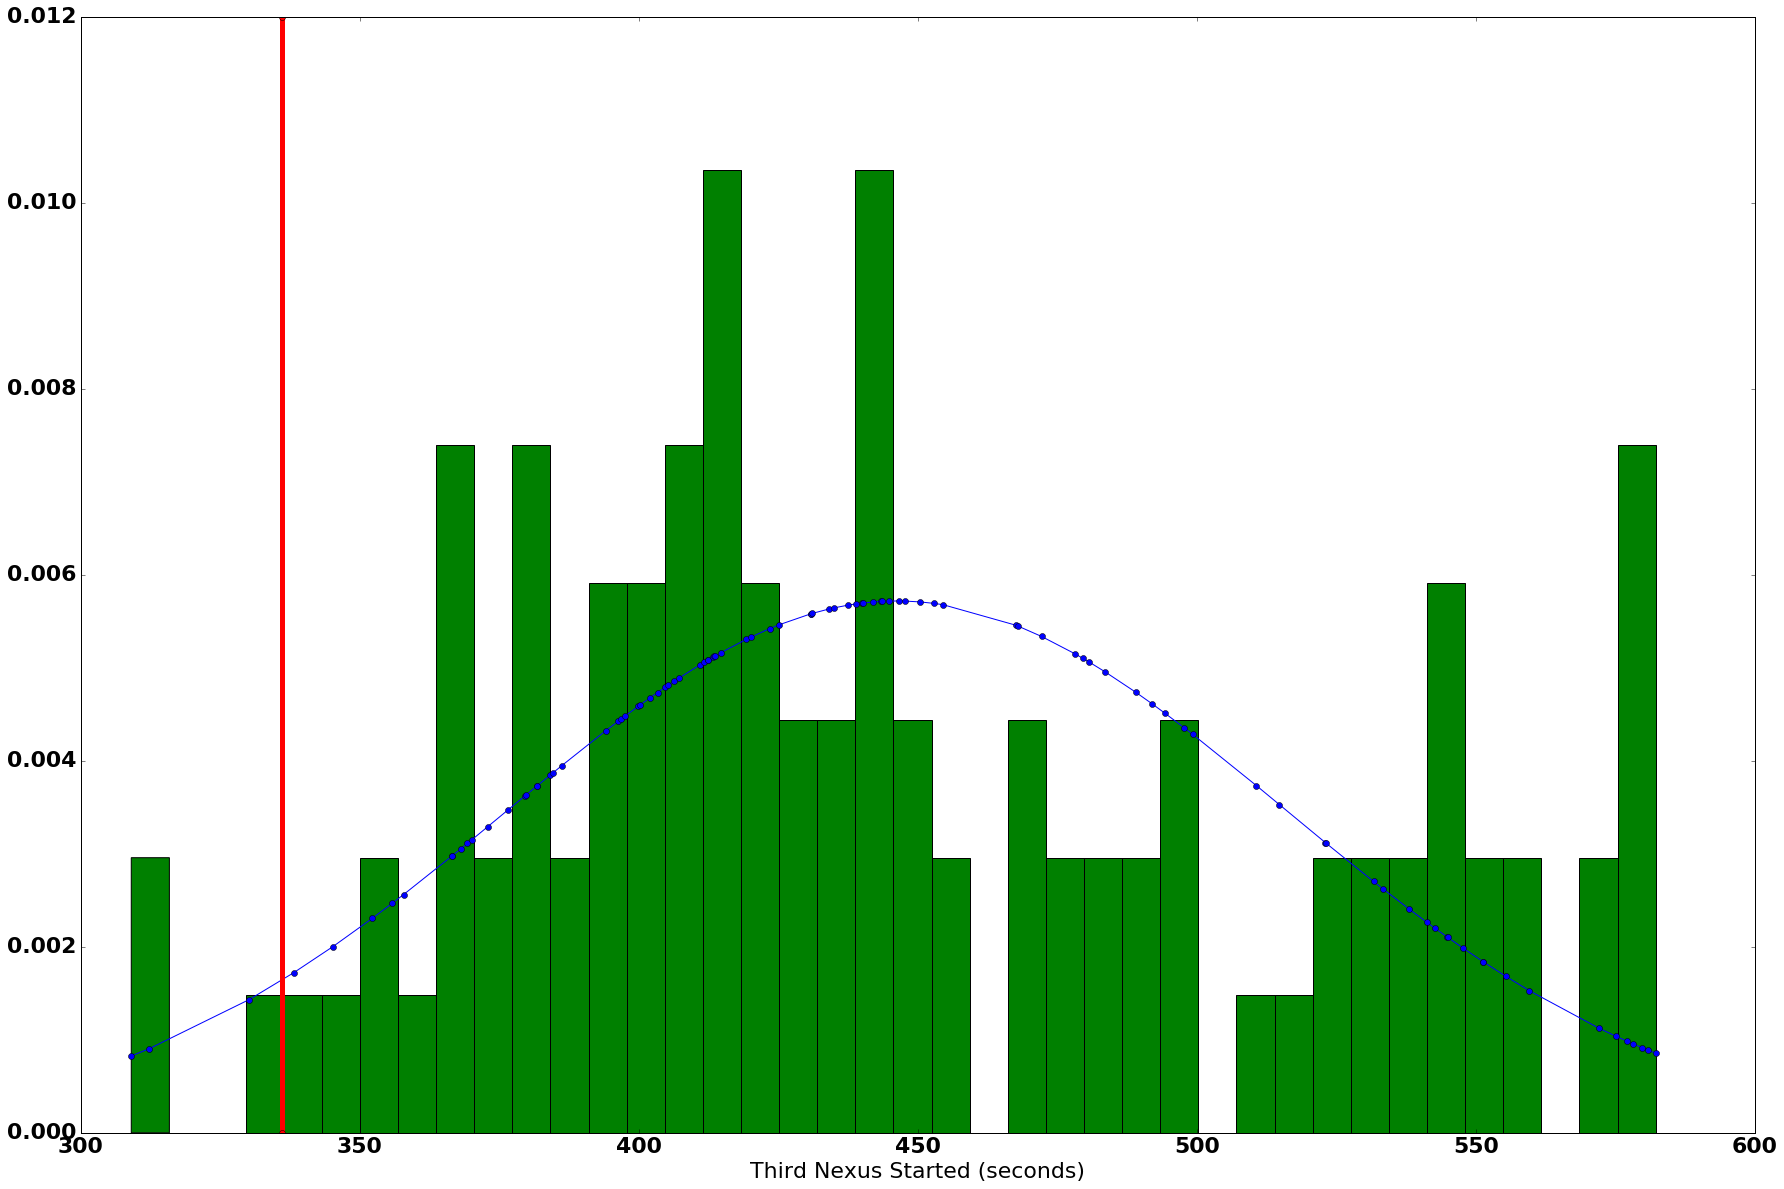

In [130]:
KTRolster_Zest_third_nexus_timing = '5:36'
minutes, seconds = KTRolster_Zest_third_nexus_timing.split(":")
third_nexus = int(seconds) + int(minutes) * 60 
print third_nexus

import matplotlib.pyplot as plt
plt.figure(1, figsize=(30,20))
fit = stats.norm.pdf(secs, np.mean(secs), np.std(secs))  #this is a fitting indeed
plt.plot(secs,fit,'-o')
plt.hist(secs, bins = 40, normed=True)


xs = [third_nexus, third_nexus]
ys = [0,plt.axis()[3]]
print plt.axis()
plt.plot(xs,ys,'-ro', linewidth=5)
plt.xlabel("Third Nexus Started (seconds)")

plt.show()


In [131]:
print "Mean              ", np.mean(secs)
print "Standard Deviation", np.std(secs)
print "Variance          ", np.var(secs)

Mean               446.27209596
Standard Deviation 69.7625693037
Variance           4866.81607585


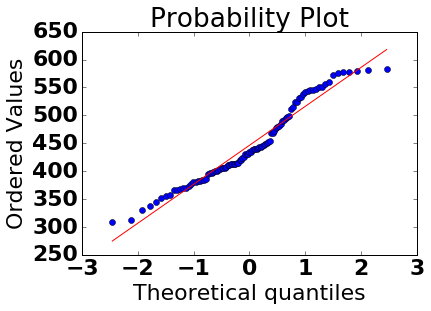

In [132]:
stats.probplot(secs, plot=plt)
plt.show()